# March 18 Notes #

# Fitting data to models #

1. Build a model
2. Create a "fitness function", i.e. something that returns a scalar "distance" between the model and the data
3. Apply an "optimizer" to get the best-fit parameters

In [9]:
from astropy import units as u

In [21]:
def gaussian_model(xarr, amplitude, offset, width):
    amplitude = u.Quantity(amplitude, u.K)
    offset = u.Quantity(offset, u.km/u.s)
    width = u.Quantity(width, u.km/u.s)
    xarr = u.Quantity(xarr, u.km/u.s)
    
    return amplitude * np.exp(-(xarr-offset)**2/(2.*width**2))

In [14]:
x = 5
u.Quantity(x, u.km/u.s)

<Quantity 5.0 km / s>

In [15]:
x = 5 * u.m/u.s
u.Quantity(x, u.km/u.s)

<Quantity 0.005 km / s>

In [16]:
xarr = np.linspace(-5,5,50) * u.km/u.s

In [18]:
gaussian(xarr, 1*u.K, 0.5*u.km/u.s, 2000*u.m/u.s)

<Quantity [ 0.02279418, 0.03002143, 0.03913061, 0.05047542, 0.06443491,
            0.08140302, 0.10177422, 0.12592531, 0.15419357, 0.18685188,
            0.22408183, 0.26594622, 0.31236257, 0.36307983, 0.41766035,
            0.47546916, 0.53567262, 0.59724775, 0.65900328, 0.71961237,
            0.77765621, 0.83167693, 0.88023705, 0.92198237, 0.95570438,
            0.98039822, 0.99531246, 0.99998698, 0.99427665, 0.9783587 ,
            0.9527237 , 0.91815036, 0.8756663 , 0.82649731, 0.77200877,
            0.71364299, 0.65285655, 0.59106127, 0.52957226, 0.46956524,
            0.41204498, 0.35782551, 0.30752184, 0.26155233, 0.22015027,
            0.18338248, 0.15117307, 0.12333007, 0.09957299, 0.07955951] K>

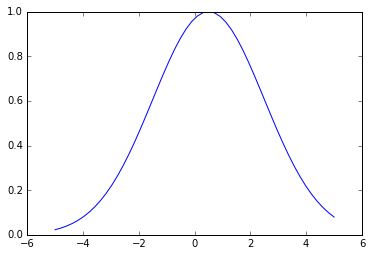

In [12]:
%matplotlib inline
import pylab as pl
pl.plot(xarr, gaussian(xarr, 1, 0.5, 2))

In [19]:
from specutils.io import fits
spec = fits.read_fits_spectrum1d('gbt_1d.fits')

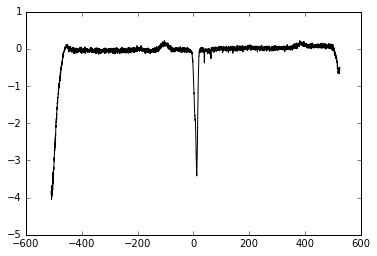

In [20]:
pl.plot(spec.velocity, spec.flux, 'k-')

In [22]:
model = gaussian_model(spec.velocity, amplitude=5*u.K, offset=5*u.km/u.s, width=5*u.km/u.s)

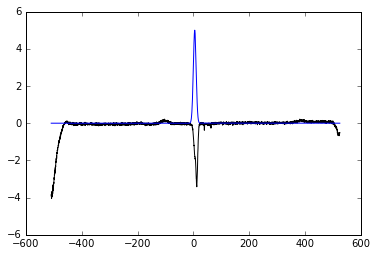

In [23]:
pl.plot(spec.velocity, spec.flux, 'k-')
pl.plot(spec.velocity, model, 'b-')

In [32]:
spec.flux * u.K

<Quantity [-0.50829212,-0.49870891,-0.52269076,..., -3.81450779,
           -3.85548328,-3.90748133] K>

In [28]:
def cost_function(params, data_range=None):
    if data_range is not None:
        data = spec.flux[data_range]
    else:
        data = spec.flux
    return (((data * u.K) - gaussian_model(spec.velocity, *params))**2).sum().value

In [29]:
params = (1,2,3)
def f(a,b,c):
    print("a={0}, b={1}, c={2}".format(a,b,c))
f(1,2,3)
f(*params)

a=1, b=2, c=3
a=1, b=2, c=3


In [30]:
cost_function((5*u.K, 5*u.km/u.s, 5*u.km/u.s))

2894.608469233504

In [33]:
from scipy.optimize import minimize

In [36]:
result = minimize(cost_function, (5, 5, 5), args=(slice(100,200),))
result

      fun: 874.0808553828039
 hess_inv: array([[ 0.02083241, -0.00701251,  0.02573938],
       [-0.00701251,  0.09174813, -0.02584566],
       [ 0.02573938, -0.02584566,  0.09195859]])
      jac: array([ -7.62939453e-06,   0.00000000e+00,  -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 130
      nit: 19
     njev: 26
   status: 0
  success: True
        x: array([ -2.98664886,  10.56106784,   5.22460432])

In [38]:
(amplitude, offset, width) = result.x

In [39]:
best_fit_model = gaussian_model(spec.velocity, *result.x)

(-30, 30)

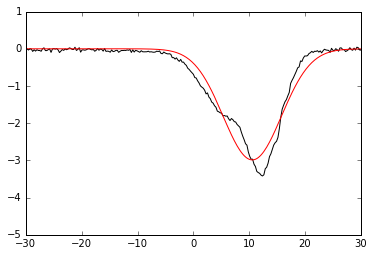

In [41]:
pl.plot(spec.velocity, spec.flux, 'k-')
pl.plot(spec.velocity, best_fit_model, 'r-')
pl.xlim(-30, 30)

# Exercise #

1. Get a better fit to the data (create a better model & fit it)

 - try using different optimizers in scipy.optimize

In [42]:
arr = np.arange(100)

In [43]:
arr[10:50]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

In [44]:
arr[slice(10,50)]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])